In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.sqlite_plus as db

Generate toy model that allows continuous phase proposals between 0 and 180

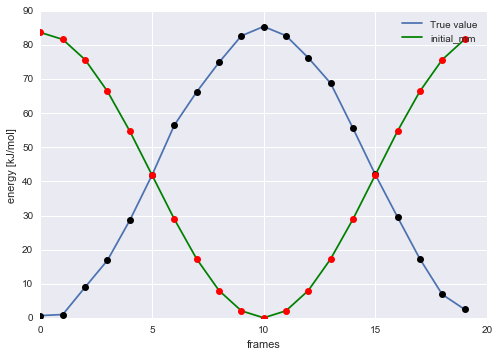

In [2]:
toy = ToyModel(true_value=DihedralType(10, 2, 180, 1, 1), initial_value=DihedralType(10, 2, 0, 1, 1), n_increments=10, 
               negative_K=True, decouple_n=True)
plt.plot(toy.synthetic_energy, label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

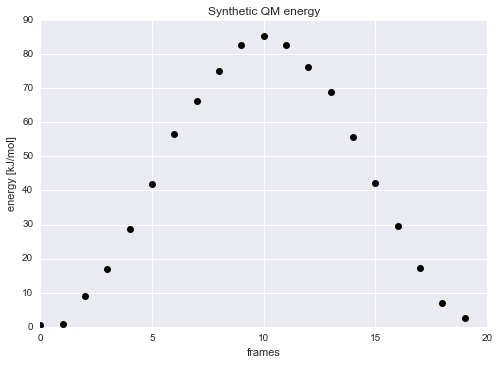

In [3]:
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.title('Synthetic QM energy')
plt.savefig('toy_QM_energy.pdf')

In [4]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='neg_K_decouple_n.sqlite')
sampler.sample(iter=1000)

 [-----------------100%-----------------] 1000 of 1000 complete in 22.7 sec

In [5]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)
print toy.model.pymc_parameters['CG331_CG321_CG321_CG331_1_K'].value

true value
<DihedralTypes [<DihedralType; phi_k=10.000, per=2, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralType; phi_k=10.000, per=2, phase=0.000,  scee=1.000, scnb=1.000>
-0.0161866329325


With continuous phase proposals torsionfit gives a good fit. 

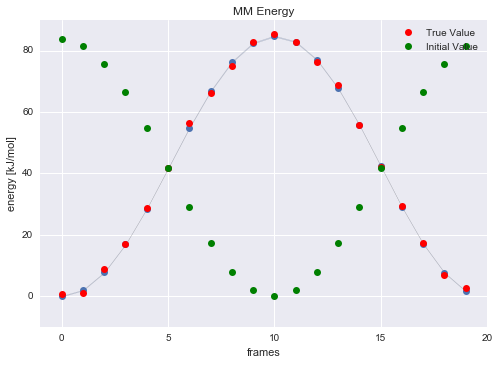

In [6]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, 'o', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, 'o', color='g', label='Initial Value')
plt.legend()
plt.savefig('toy_mm_energy_neg_k_decouple_n.pdf')

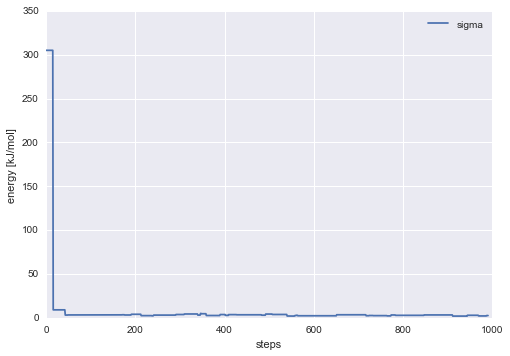

In [7]:
plt.plot(np.exp(sampler.trace('sigma')[9:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_neg_K_decouple_n.pdf')

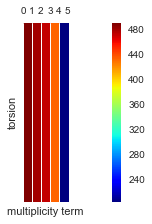

In [8]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')
plt.savefig('multiplicity_neg_K_decouple_n.pdf')

From the traces of each parameters, you can see how the phase slowly moves to 180 as multiplicity 1 truns on and 2 turns off 

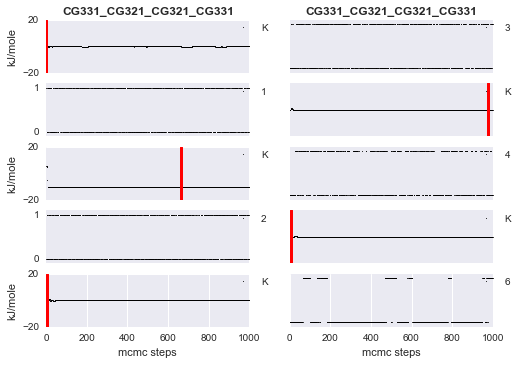

In [9]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=2.0)

Generate new toy model which only allows discrete phase angles at 0 and 180. Nothing in between

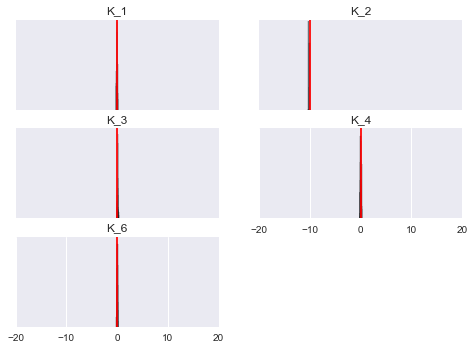

In [10]:
# Plot histograms of Force Constants
fig = plt.figure()
axes_k = plt.subplot(3, 2, 1)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_1')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_2_K')[100:])
plt.axvline(-10, color='r', label='True Value')
plt.title('K_2')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 3)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_3_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_3')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 4)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_4_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_4')
plt.yticks([])
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)

axes_k = plt.subplot(3, 2, 5)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_6_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_6')
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)
plt.yticks([])

fig.savefig('ForceK_hist.pdf')

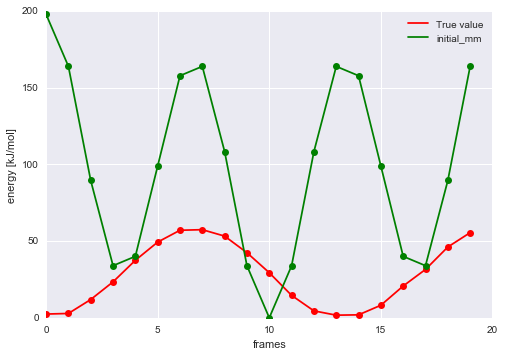

In [22]:
toy = ToyModel(n_increments=10, negative_K=True, decouple_n=True)
plt.plot(toy.synthetic_energy, color='r', label='True value')
plt.plot(toy.synthetic_energy, 'o', color='r')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'o', color='g')
plt.legend()

In [23]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)

true value
<DihedralTypes [<DihedralType; phi_k=6.924, per=3, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralTypes [<DihedralType; phi_k=19.116, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=4.522, per=2, phase=0.000,  scee=1.000, scnb=1.000>]>


In [24]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='randomized.sqlit')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 224.4 sec

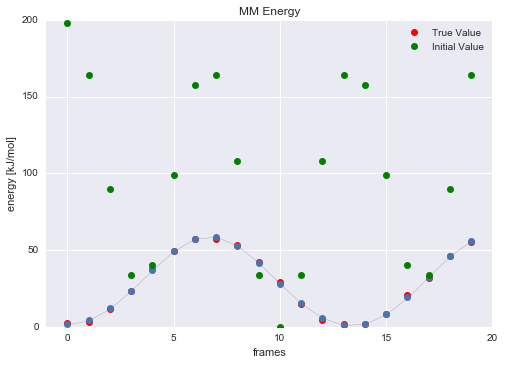

In [25]:
plt.plot(toy.synthetic_energy, 'o', color='r', label='True Value')
seaborn.tsplot(sampler.trace('mm_energy')[:][:,:40], interpolate=False)
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, 'o', color='g', label='Initial Value')
plt.legend()
plt.savefig('toy_mm_energy_neg_K_decouple_n_randomized.pdf')

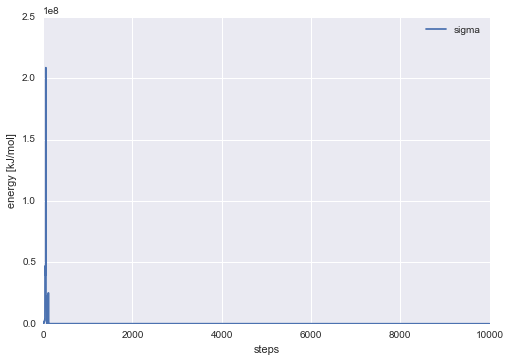

In [26]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_neg_K_decouple_n_randomized.pdf')

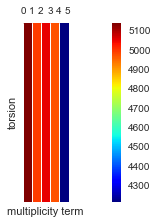

In [27]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')
plt.savefig('multiplicity_randomized_neg_K_decouple_n.pdf')

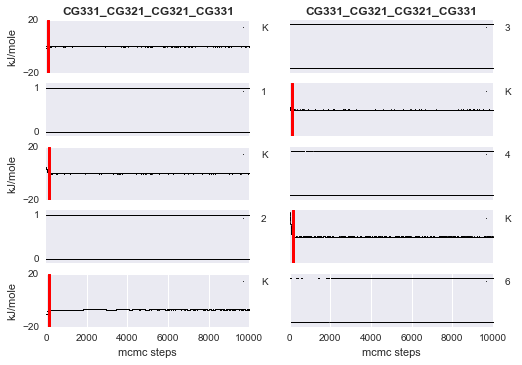

In [28]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=2.0)

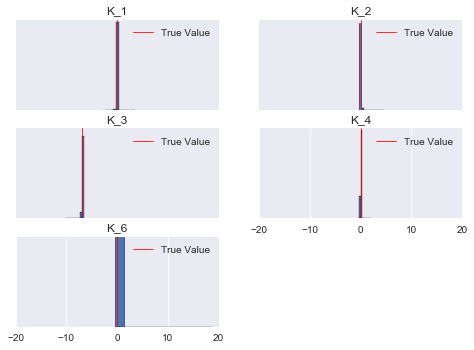

In [33]:
# Plot histograms of Force Constants
fig = plt.figure()
axes_k = plt.subplot(3, 2, 1)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_K')[:])
plt.axvline(0, color='r', label='True Value', linewidth=0.8)
plt.title('K_1')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])
plt.legend()

axes_k = plt.subplot(3, 2, 2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_2_K')[:])
plt.axvline(0, color='r', label='True Value', linewidth=0.8)
plt.title('K_2')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])
plt.legend()


axes_k = plt.subplot(3, 2, 3)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_3_K')[:])
plt.axvline(-6.924, color='r', label='True Value', linewidth=0.8)
plt.title('K_3')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])
plt.legend()


axes_k = plt.subplot(3, 2, 4)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_4_K')[:])
plt.axvline(0, color='r', label='True Value', linewidth=0.8)
plt.title('K_4')
plt.yticks([])
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)
plt.legend()


axes_k = plt.subplot(3, 2, 5)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_6_K')[:])
plt.axvline(0, color='r', label='True Value', linewidth=0.8)
plt.title('K_6')
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)
plt.yticks([])
plt.legend()


fig.savefig('ForceK_hist_randomized_decouple_n.pdf')